In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_test=pd.read_csv('rm_training_01.csv')

In [8]:
df_test.head()

,employee_id,number_of_jobs,last_job_type,last_job_industry,experience_in_dbs,experience_outside_dbs,experience_in_fin,experience_in_insurance,target_achievement,overall_performance
0,50,2,tech,insurance,8,0,8,0,MEDIUM,1
1,2188,0,NaN,NaN,8,0,8,0,MEDIUM,1
2,958,0,NaN,NaN,8,0,8,0,MEDIUM,1
3,777,2,other,finance,7,6,9,3,MEDIUM,1
4,281,0,NaN,NaN,4,0,4,0,MEDIUM,1


In [12]:
#df_test.groupby(df_test['number_of_jobs	','overall_performance'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 10 columns):
employee_id                818 non-null int64
number_of_jobs             818 non-null int64
last_job_type              408 non-null object
last_job_industry          408 non-null object
experience_in_dbs          818 non-null int64
experience_outside_dbs     818 non-null int64
experience_in_fin          818 non-null int64
experience_in_insurance    818 non-null int64
target_achievement         818 non-null object
overall_performance        818 non-null int64
dtypes: int64(7), object(3)
memory usage: 64.0+ KB


In [13]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

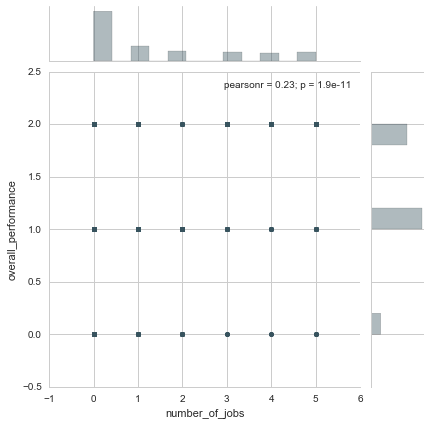

In [14]:
sns.jointplot(x='number_of_jobs',y='overall_performance',data=df_test)

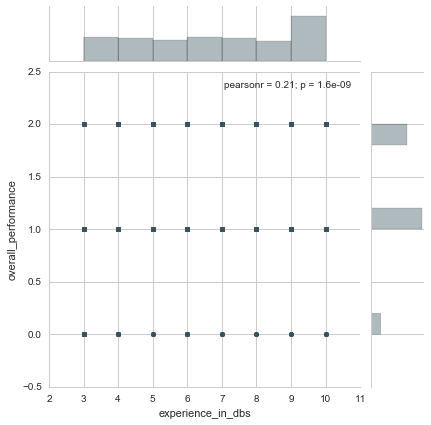

In [16]:
sns.jointplot(x='experience_in_dbs',y='overall_performance',data=df_test)

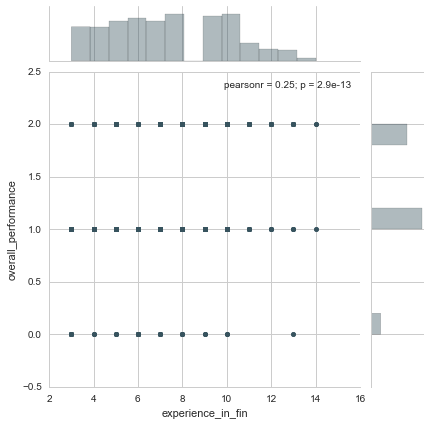

In [17]:
sns.jointplot(x='experience_in_fin',y='overall_performance',data=df_test)

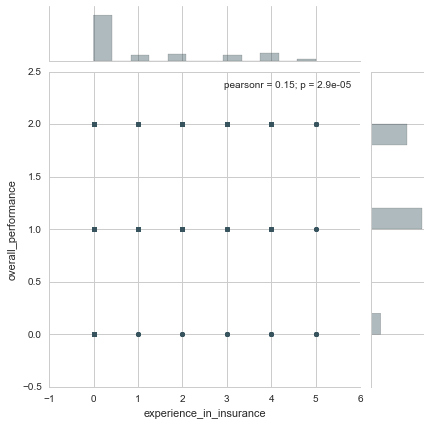

In [19]:
sns.jointplot(x='experience_in_insurance',y='overall_performance',data=df_test)

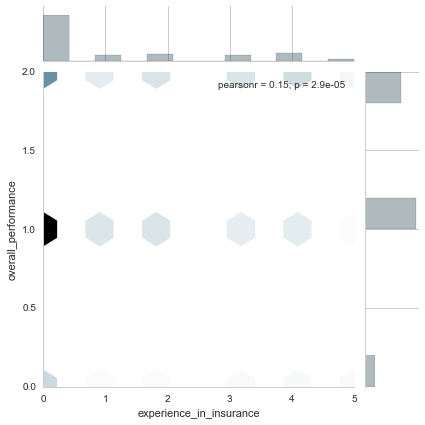

In [21]:
sns.jointplot(x='experience_in_insurance',y='overall_performance',kind='hex',data=df_test)

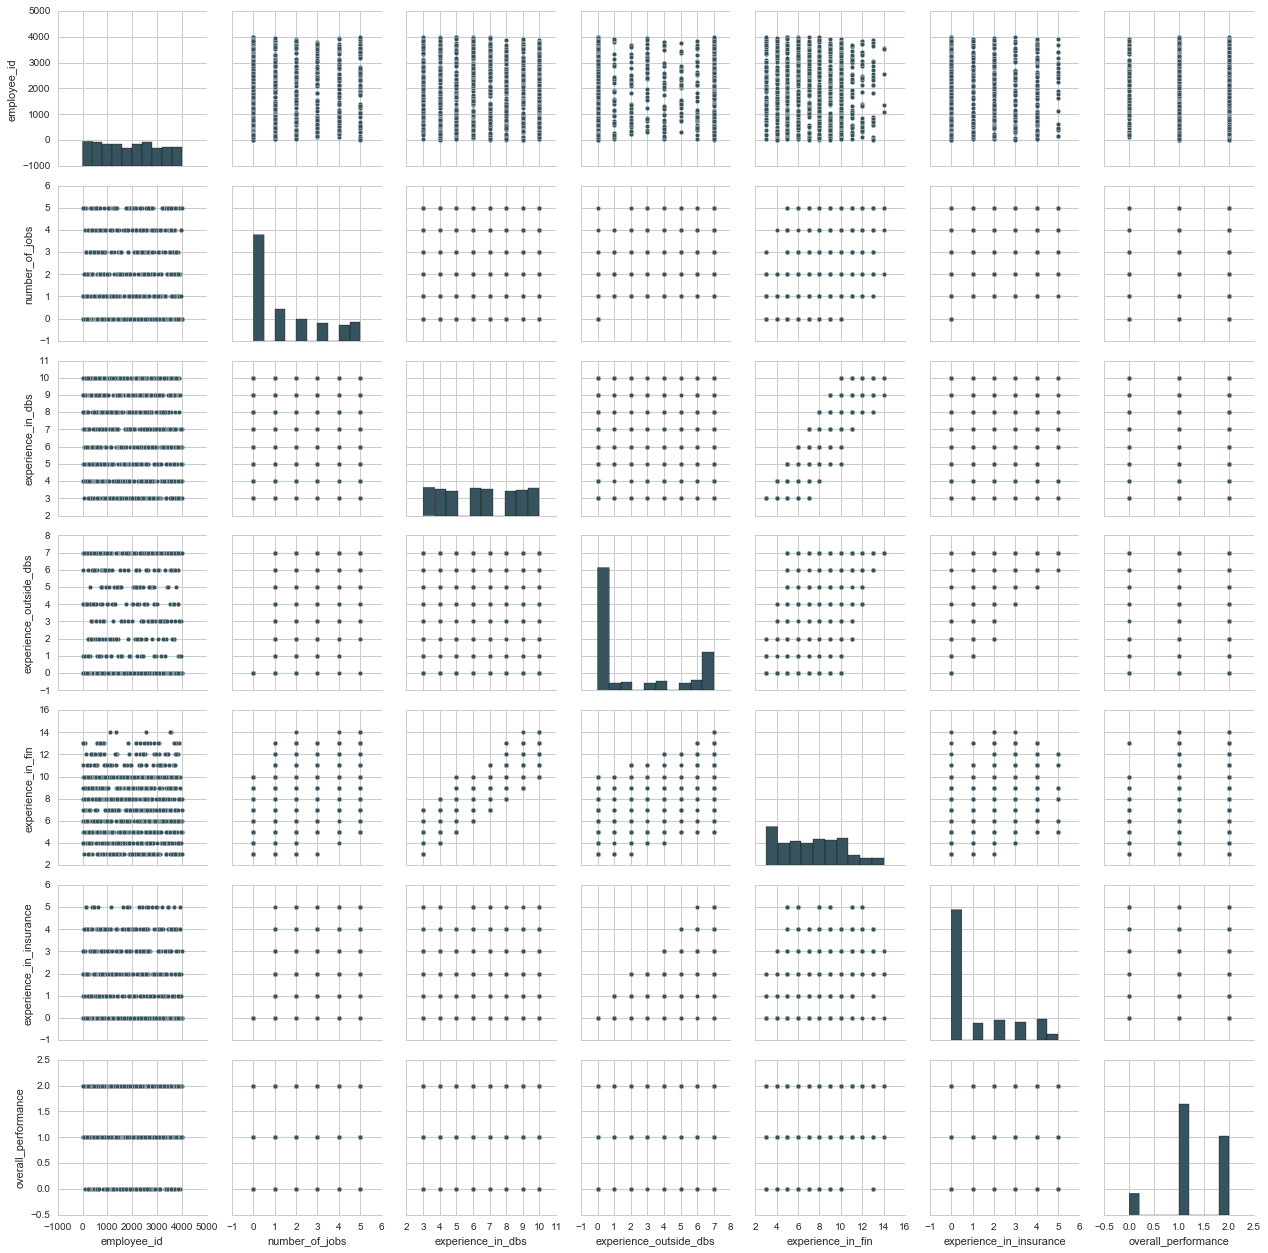

In [22]:
sns.pairplot(df_test)

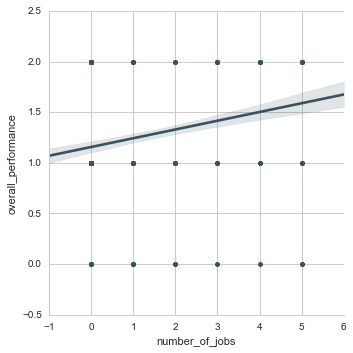

In [25]:
sns.lmplot(x='number_of_jobs',y='overall_performance',data=df_test)

In [27]:
y = df_test['overall_performance']

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 10 columns):
employee_id                818 non-null int64
number_of_jobs             818 non-null int64
last_job_type              408 non-null object
last_job_industry          408 non-null object
experience_in_dbs          818 non-null int64
experience_outside_dbs     818 non-null int64
experience_in_fin          818 non-null int64
experience_in_insurance    818 non-null int64
target_achievement         818 non-null object
overall_performance        818 non-null int64
dtypes: int64(7), object(3)
memory usage: 64.0+ KB


In [34]:
df_test['last_job_type'].unique()

#df_test['last_job_type'].groupby(['last_job_type'], as_index=False).mean().sort_values(by='last_job_type', ascending=False)


array(['tech', nan, 'other', 'finance', 'sales', 'hr'], dtype=object)

In [35]:
df_test['last_job_industry'].unique()



array(['insurance', nan, 'finance', 'other', 'telecom', 'tech'], dtype=object)

In [ ]:
array(['insurance', nan, 'finance', 'other', 'telecom', 'tech'], dtype=object)

In [37]:
X = df_test[['number_of_jobs', 'experience_in_dbs','experience_outside_dbs', 'experience_in_fin']]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [44]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.11817317  0.05742031 -0.01451062 -0.0058915 ]


In [46]:
predictions = lm.predict( X_test)

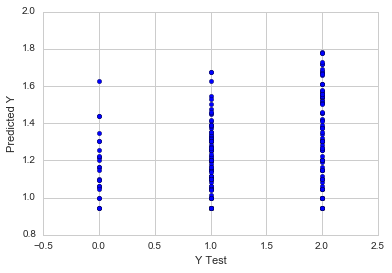

In [47]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.523606678163
MSE: 0.412046590801
RMSE: 0.641908553301


/Users/vishnoiprem/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


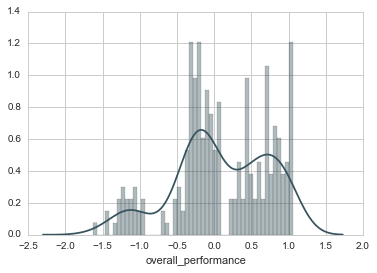

In [49]:
sns.distplot((y_test-predictions),bins=50);

In [50]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
number_of_jobs,0.118173
experience_in_dbs,0.057420
experience_outside_dbs,-0.014511
experience_in_fin,-0.005891


In [51]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 10 columns):
employee_id                818 non-null int64
number_of_jobs             818 non-null int64
last_job_type              408 non-null object
last_job_industry          408 non-null object
experience_in_dbs          818 non-null int64
experience_outside_dbs     818 non-null int64
experience_in_fin          818 non-null int64
experience_in_insurance    818 non-null int64
target_achievement         818 non-null object
overall_performance        818 non-null int64
dtypes: int64(7), object(3)
memory usage: 64.0+ KB


In [54]:
df_test[['number_of_jobs', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)



,overall_performance,number_of_jobs
2,2,2.016340
1,1,0.860140
0,0,1.361446


In [55]:
df_test[['number_of_jobs', 'overall_performance']].groupby(['overall_performance'], as_index=False).count().sort_values(by='overall_performance', ascending=False)



,overall_performance,number_of_jobs
2,2,306
1,1,429
0,0,83


In [56]:
df_test[['number_of_jobs', 'overall_performance']].groupby(['overall_performance'], as_index=False).sum().sort_values(by='overall_performance', ascending=False)



,overall_performance,number_of_jobs
2,2,617
1,1,369
0,0,113


In [57]:
df_test[['experience_in_dbs', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)



,overall_performance,experience_in_dbs
2,2,6.960784
1,1,6.377622
0,0,5.228916


In [58]:
df_test[['experience_outside_dbs', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)



,overall_performance,experience_outside_dbs
2,2,2.993464
1,1,1.466200
0,0,2.361446


In [59]:
df_test[['experience_in_fin', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)




,overall_performance,experience_in_fin
2,2,8.176471
1,1,7.009324
0,0,6.120482


In [60]:
df_test[['experience_in_insurance', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)



,overall_performance,experience_in_insurance
2,2,1.477124
1,1,0.701632
0,0,1.240964


In [61]:
df_test.describe(include=['O'])


,last_job_type,last_job_industry,target_achievement
count,408,408,818
unique,5,5,3
top,other,tech,MEDIUM
freq,93,91,664


In [70]:
def fun(row):
    if  row=='HIGH':
        return 2
    elif row=='MEDIUM':
        return 1
    else:
        return 0
        
    

df_test['target_achievement_str']=df_test['target_achievement'].apply(fun)

In [71]:
df_test[['target_achievement_str', 'overall_performance']].groupby(['overall_performance'], as_index=False).mean().sort_values(by='overall_performance', ascending=False)



,overall_performance,target_achievement_str
2,2,1.392157
1,1,1.000000
0,0,0.662651


In [72]:
df_test[['target_achievement_str', 'overall_performance']].groupby(['overall_performance'], as_index=False).count().sort_values(by='overall_performance', ascending=False)



,overall_performance,target_achievement_str
2,2,306
1,1,429
0,0,83


In [73]:
df_test[['target_achievement_str', 'overall_performance']].groupby(['target_achievement_str'], as_index=False).count().sort_values(by='overall_performance', ascending=False)



,target_achievement_str,overall_performance
1,1,664
2,2,123
0,0,31
